In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

### - Section 1: Dataset Overview:

In [163]:
# Basic ques for understand the Data:

# Q1: How does the data looks like?
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Q2: Shape of the dataset?
print("Dataset Shape:", df.shape)

# Q3: What is the data type of columns?
df.info()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [10]:
# Q4: Are there any missing values?
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Q5: How does the data look mathematically?
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
# Q6: Are there duplicate values?
df.duplicated().sum()

np.int64(0)

In [13]:
# Q7: How is the correlation between columns?

# df.corr() => It calculates the pairwise correlation between numeric columns in a DataFrame. Correlation measures how strongly two variables are related (-1 to 1).
df.corr(numeric_only=True)  # Explicitly tell pandas to use only numeric column 

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


### - Section 2: Missing Value Analysis:

In [ ]:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percentage
})

missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)


### - Section 3: Duplicate Data Check:

In [166]:
duplicate_count = df.duplicated().sum()
print("Total Duplicate Rows:", duplicate_count)

# Remove duplicates
# df = df.drop_duplicates()
# print("Shape after removing duplicates:", df.shape)

Total Duplicate Rows: 0


### - Section 4: Statistical Summary:

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### - Section 5: Outlier Detection: (IQR Method)

SeniorCitizen: 1142 outliers
tenure: 0 outliers
MonthlyCharges: 0 outliers


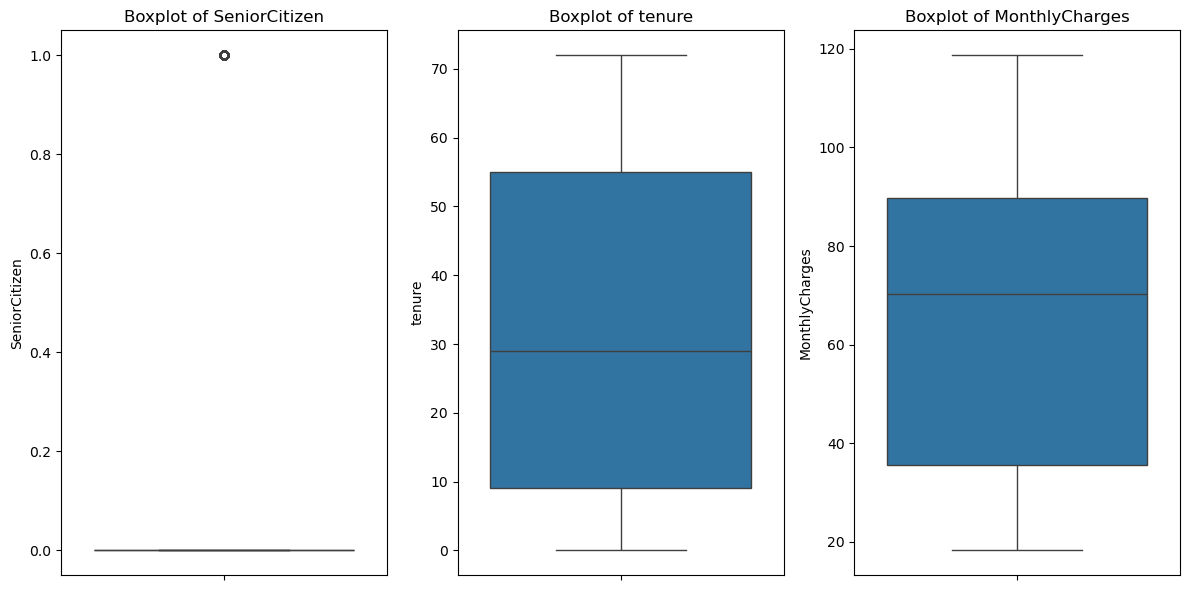

In [5]:
# Outliers are detected using the Interquartile Range (IQR) method for numerical columns

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {outliers.shape[0]} outliers")


# Box Plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

Based on the boxplot descriptions, here's what I understand:

- SeniorCitizen has severe outlier issues suggesting data quality problems or extreme imbalance

- Tenure and MonthlyCharges appear normally distributed without outliers

- For modeling, SeniorCitizen would need outlier treatment or transformation

### Start EDA Analysis

### - Univariate Analysis:

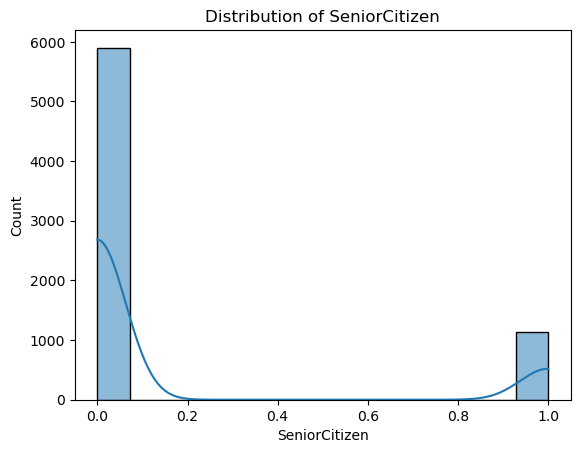

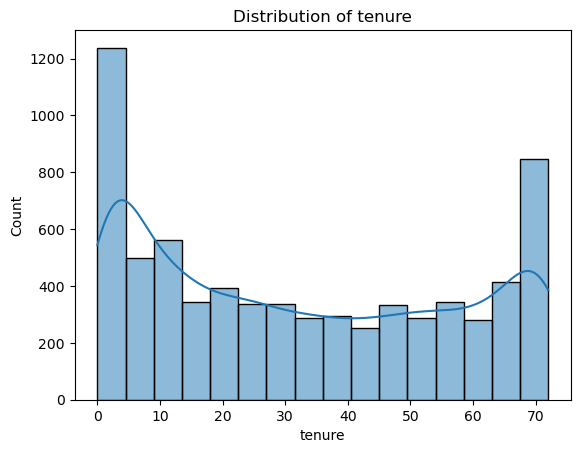

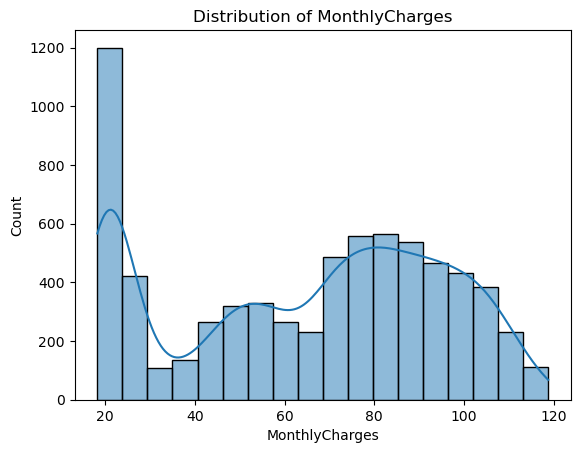

In [ ]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Summary:

1. The chart shows a heavily imbalanced distribution of senior citizens, with the vast majority (over 5,000) being non-senior (0.0), while a small fraction (under 1,000) are senior citizens (1.0).

2. The tenure distribution shows a high frequency of customers with very low tenure (near 0 months), decreasing rapidly. The count then rises again for customers with the longest tenures (near 70 months), indicating customer loyalty.

3. The distribution of monthly charges is bimodal, with a large concentration of customers paying around $20 and a second, smaller peak near $80. Counts are lowest for charges in the mid-range between these two peaks.

### - Correlation Analysis:

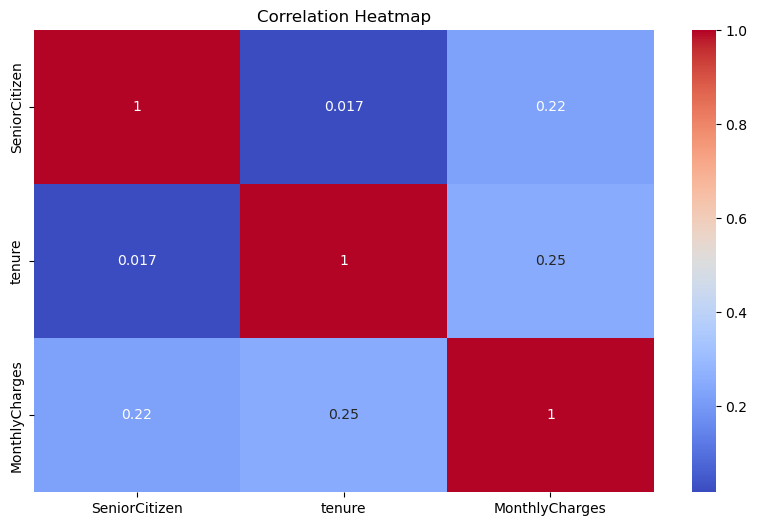

In [174]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Summary:
- From the correlation heatmap, there is a very weak positive correlation (0.25) between SeniorCitizen and MonthlyCharges. All other relationships, including SeniorCitizen with tenure and tenure with MonthlyCharges, show negligible correlation.

### - Basic Cleaning the data:

In [ ]:
# in this datasets TotalCharges cols, it should be float type, but here this is Object.
print(f"Unique types: {df['TotalCharges'].unique()}")  # here is some blanks strings

# Check for blanks strings
empty_strings = (df['TotalCharges'] == ' ').sum()
print(f"Empty strings: {empty_strings}")

Unique types: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Empty strings: 11


In [ ]:
# Replace blank space to 0 and object to float value
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0").astype("float")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### - How many people are churn?

Text(0.5, 1.0, 'Churn Distribution')

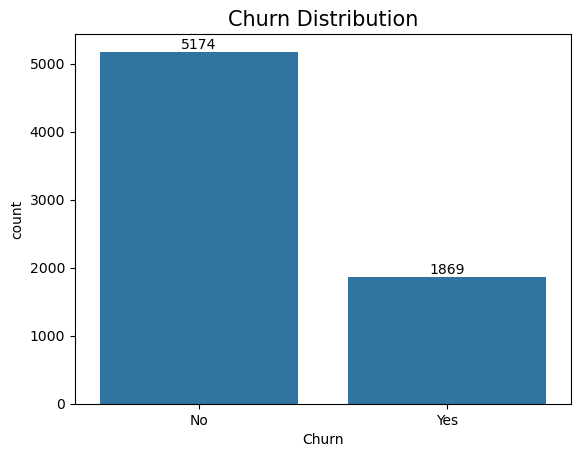

In [ ]:
countChurnPlot = sns.countplot(data=df, x='Churn')
countChurnPlot.bar_label(countChurnPlot.containers[0])

plt.title('Churn Distribution', fontsize=15)

In [29]:
df['Churn'].value_counts().sum()

np.int64(7043)

Text(0.5, 1.0, 'Churn Distribution in Percentage')

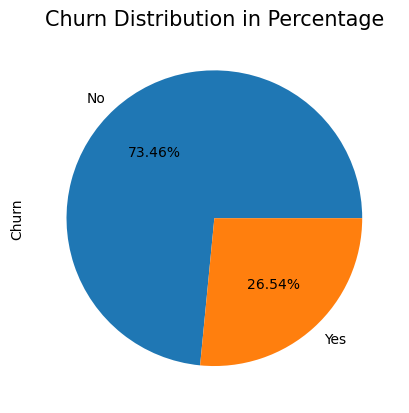

In [37]:
# in %

df['Churn'].value_counts().plot(ylabel='Churn', kind='pie', autopct='%1.2f%%')
plt.title('Churn Distribution in Percentage', fontsize=15)

Decisions:
- from the given pie chart we can conclude that, 26.54% of our customers have churned out. now let's explore the reason behind this

#### - Churn by Gender

In [52]:
# create a contingency table
pd.crosstab(df['gender'], df['Churn'])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


Text(0.5, 1.0, 'Churn by Gender')

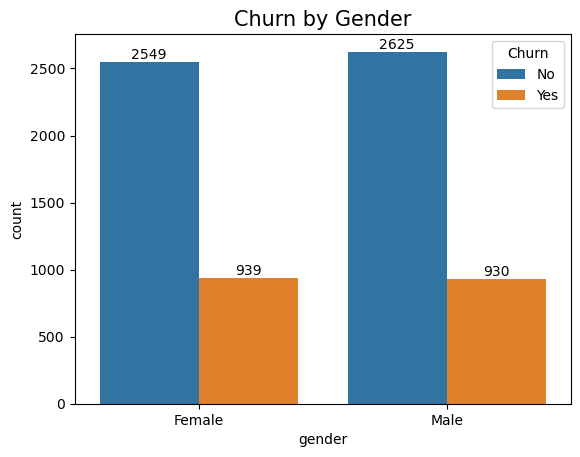

In [51]:
x = sns.countplot(x=df['gender'], hue=df['Churn'])
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])

plt.title('Churn by Gender', fontsize=15)

Decisions:
- Here We can see, Gender are not perform any role for 'churning', and Gender is not a strong churn predictor in this dataset.

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### - Churn by SeniorCitizen

Text(0.5, 1.0, 'Count Senior Citizen vs Non Senior Citizen')

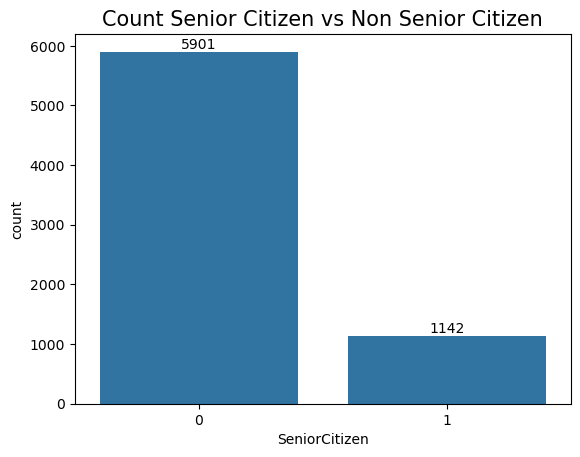

In [85]:
x = sns.countplot(x=df['SeniorCitizen'])
x.bar_label(x.containers[0])

plt.title('Count Senior Citizen vs Non Senior Citizen', fontsize=15)

Text(0.5, 1.0, 'Churn by SeniorCitizen')

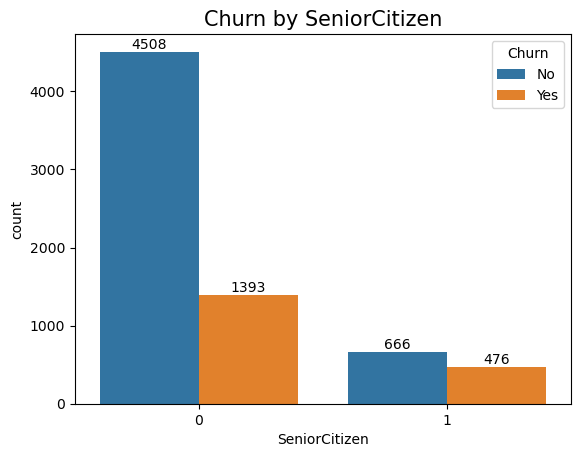

In [70]:
x = sns.countplot(x=df['SeniorCitizen'], hue=df['Churn'])
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])

plt.title('Churn by SeniorCitizen', fontsize=15)

<Figure size 500x500 with 0 Axes>

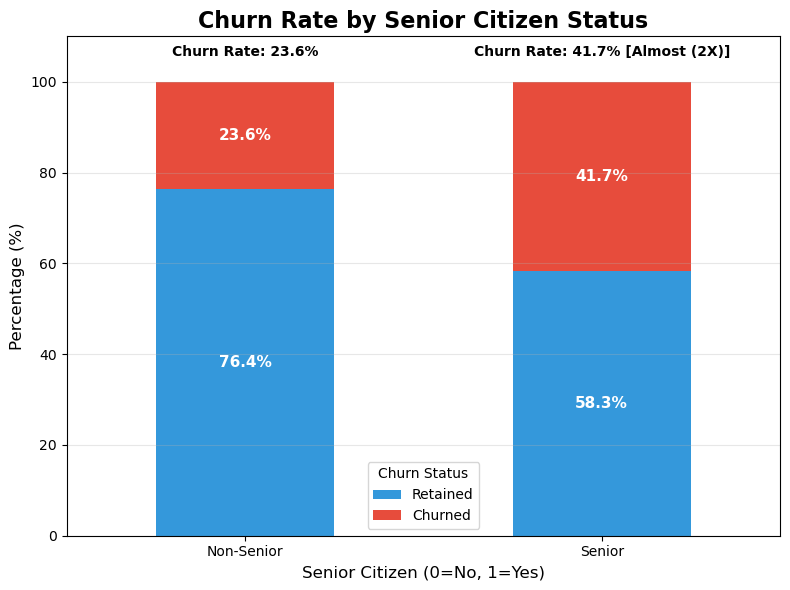

In [93]:
# Percentage Stacked Bar Chart (Most Insightful)

plt.figure(figsize=(5, 5))
cross_tab_pct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
ax = cross_tab_pct.plot(kind='bar', stacked=True, 
                        color=['#3498db', '#e74c3c'],  # Blue for No, Red for Yes
                        figsize=(8, 6))

plt.title('Churn Rate by Senior Citizen Status', fontsize=16, fontweight='bold')
plt.xlabel('Senior Citizen (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks([0, 1], ['Non-Senior', 'Senior'], rotation=0)
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])

# Add percentage labels
for i in range(len(cross_tab_pct)):
    # Bottom segment (Retained percentage)
    retained_pct = cross_tab_pct.iloc[i, 0]
    ax.text(i, retained_pct/2, f'{retained_pct:.1f}%', 
            ha='center', va='center', color='white', fontweight='bold', fontsize=11)
    
    # Top segment (Churned percentage)
    churned_pct = cross_tab_pct.iloc[i, 1]
    ax.text(i, retained_pct + churned_pct/2, f'{churned_pct:.1f}%', 
            ha='center', va='center', color='white', fontweight='bold', fontsize=11)
    
    # Add churn rate comparison
    if i == 0:
        ax.text(i, 105, f'Churn Rate: {churned_pct:.1f}%', 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    else:
        ax.text(i, 105, f'Churn Rate: {churned_pct:.1f}% [Almost (2X)]', 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Decisions:
- Senior citizens are churning at approximately DOUBLE(2x) the rate of non-senior customers.

#### - Churn by Tenure:

In [94]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5858,8241-JUIQO,Female,0,No,No,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.45,1336.35,No
5089,0277-BKSQP,Male,0,Yes,Yes,8,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,54.40,475.1,No
6662,6810-VCAEX,Female,0,No,No,47,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Credit card (automatic),39.65,1798.65,No


In [106]:
print(f"Max tenure is: {df['tenure'].max()}")
print(f"Min tenure is: {df['tenure'].min()}")

Max tenure is: 72
Min tenure is: 0


Text(0.5, 1.0, 'Tenure vs Churn Distribution')

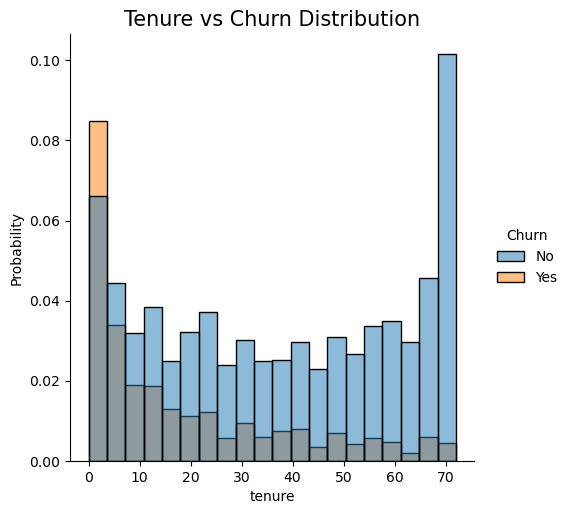

In [115]:
sns.displot(x=df['tenure'], hue=df['Churn'], stat='probability', bins=20)
plt.title('Tenure vs Churn Distribution', fontsize=15)

Decisions:

- New customers (low tenure) are much more likely to churn.
- Loyal customers (high tenure) are more likely to stay (not churn).

Conclusion:
- Tenure is a strong predictor of churn. The shorter the tenure, the higher the risk of churn.
- The company should focus retention efforts on new customers (e.g., during the first year).

#### Churn by Contract:

In [116]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6749,8469-SNFFH,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),79.40,5528.9,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
585,5192-EBGOV,Female,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.70,85.7,Yes


In [117]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '3875'), Text(0, 0, '1473'), Text(0, 0, '1695')]

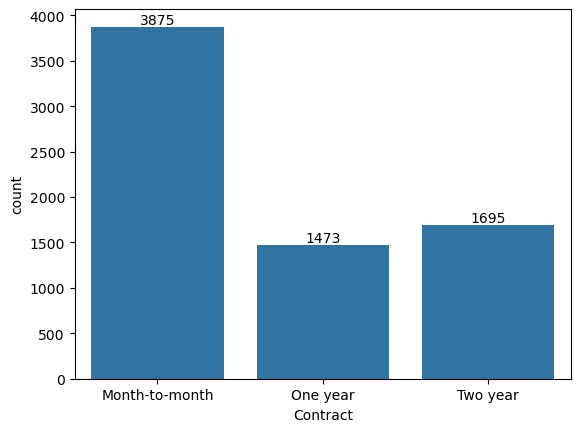

In [128]:
cnt = sns.countplot(data=df, x='Contract')
cnt.bar_label(cnt.containers[0])

Text(0.5, 1.0, 'Churn by Contract')

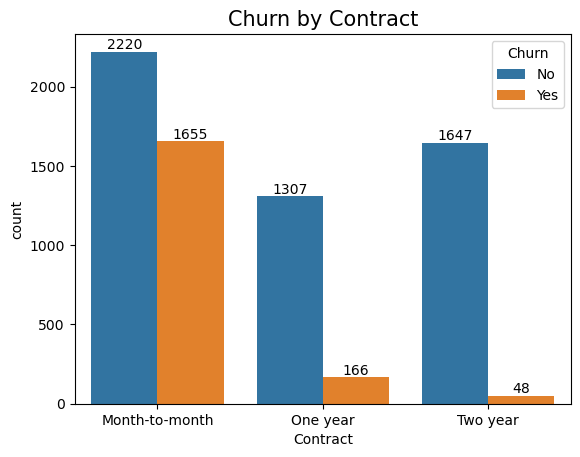

In [119]:
cnt = sns.countplot(x=df['Contract'], hue=df['Churn'])
cnt.bar_label(cnt.containers[0])
cnt.bar_label(cnt.containers[1])

plt.title('Churn by Contract', fontsize=15)

<Figure size 1000x600 with 0 Axes>

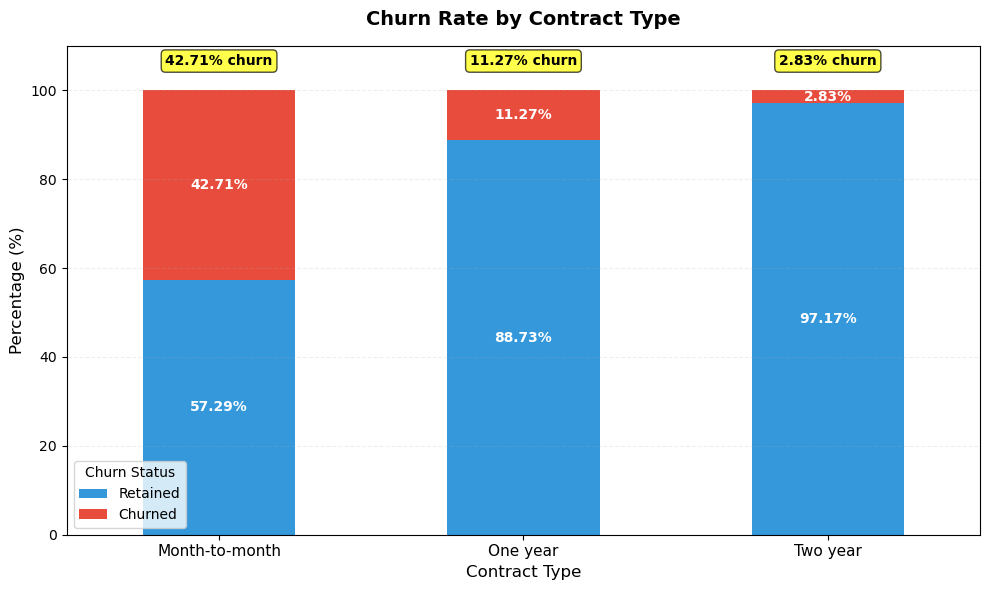

In [129]:
plt.figure(figsize=(10, 6))

try:
    # Calculate percentages
    cross_tab_pct = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
    
    # Define logical order for contracts
    contract_order = ['Month-to-month', 'One year', 'Two year']
    
    # Check which contract types exist in data
    existing_contracts = [ct for ct in contract_order if ct in cross_tab_pct.index]
    
    # Reindex only if all expected contracts exist
    if len(existing_contracts) > 0:
        cross_tab_pct = cross_tab_pct.reindex(existing_contracts)
    
    # Get colors - ensure we have enough colors for all categories
    colors = ['#3498db', '#e74c3c']  # Blue for No, Red for Yes
    
    # Plot stacked bars
    ax = cross_tab_pct.plot(kind='bar', stacked=True, 
                            color=colors[:cross_tab_pct.shape[1]],
                            figsize=(10, 6))
    
    plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold', pad=15)
    plt.xlabel('Contract Type', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=0, fontsize=11)
    
    # Adjust legend based on available columns
    legend_labels = []
    if 'No' in cross_tab_pct.columns:
        legend_labels.append('Retained')
    if 'Yes' in cross_tab_pct.columns:
        legend_labels.append('Churned')
    
    plt.legend(legend_labels, title='Churn Status', fontsize=10)
    
    # Add percentage labels
    for i in range(len(cross_tab_pct)):
        # Initialize values
        retained_pct = 0
        churned_pct = 0
        
        # Safely get values
        if 'No' in cross_tab_pct.columns:
            retained_pct = cross_tab_pct.iloc[i, cross_tab_pct.columns.get_loc('No')]
        if 'Yes' in cross_tab_pct.columns:
            churned_pct = cross_tab_pct.iloc[i, cross_tab_pct.columns.get_loc('Yes')]
        
        # Add retained percentage
        if retained_pct > 0:
            ax.text(i, retained_pct/2, f'{retained_pct:.2f}%', 
                   ha='center', va='center', color='white', 
                   fontweight='bold', fontsize=10)
        
        # Add churned percentage
        if churned_pct > 0:
            ax.text(i, retained_pct + churned_pct/2, f'{churned_pct:.2f}%', 
                   ha='center', va='center', color='white', 
                   fontweight='bold', fontsize=10)
        
        # Add total churn rate annotation
        ax.text(i, 105, f'{churned_pct:.2f}% churn', 
               ha='center', va='bottom', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    plt.ylim(0, 110)
    plt.grid(axis='y', alpha=0.2, linestyle='--')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error creating plot: {e}")
    print("\nDebug information:")
    print(f"Unique Contract values: {df['Contract'].unique()}")
    print(f"Unique Churn values: {df['Churn'].unique()}")

Decisions:

1. Churn rate is highest for month-to-month contracts (42.71% churn). This is a critical issue because almost half of the customers on a month-to-month contract are leaving.

2. Churn rate decreases with longer contract commitments:

- One year contract: 11.27% churn (significantly lower than month-to-month)

- Two year contract: only 2.83% churn (very low)

Critical Finding:

- Contract length dramatically impacts churn rate. Month-to-month contracts have 15X higher churn than two-year contracts.

#### - Churn by Partner

Text(0.5, 1.0, 'Churn by Partner')

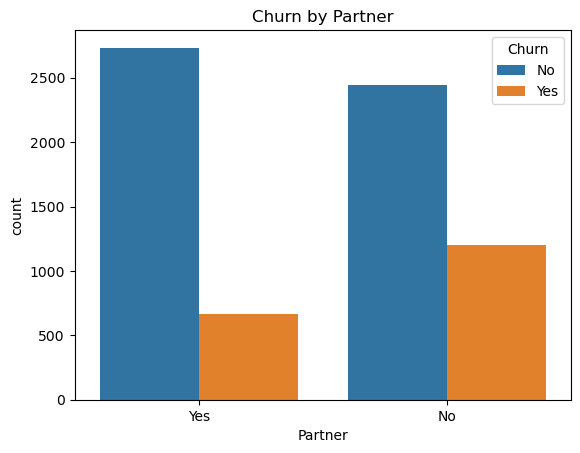

In [137]:
sns.countplot(data=df, x='Partner', hue='Churn')
plt.title("Churn by Partner")

#### - Analysis  by All Services

In [133]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [134]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4509,2013-SGDXK,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,84.30,84.3,Yes
4341,3754-DXMRT,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.15,92.65,Yes
4712,7550-WIQVA,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,108.25,5431.4,No


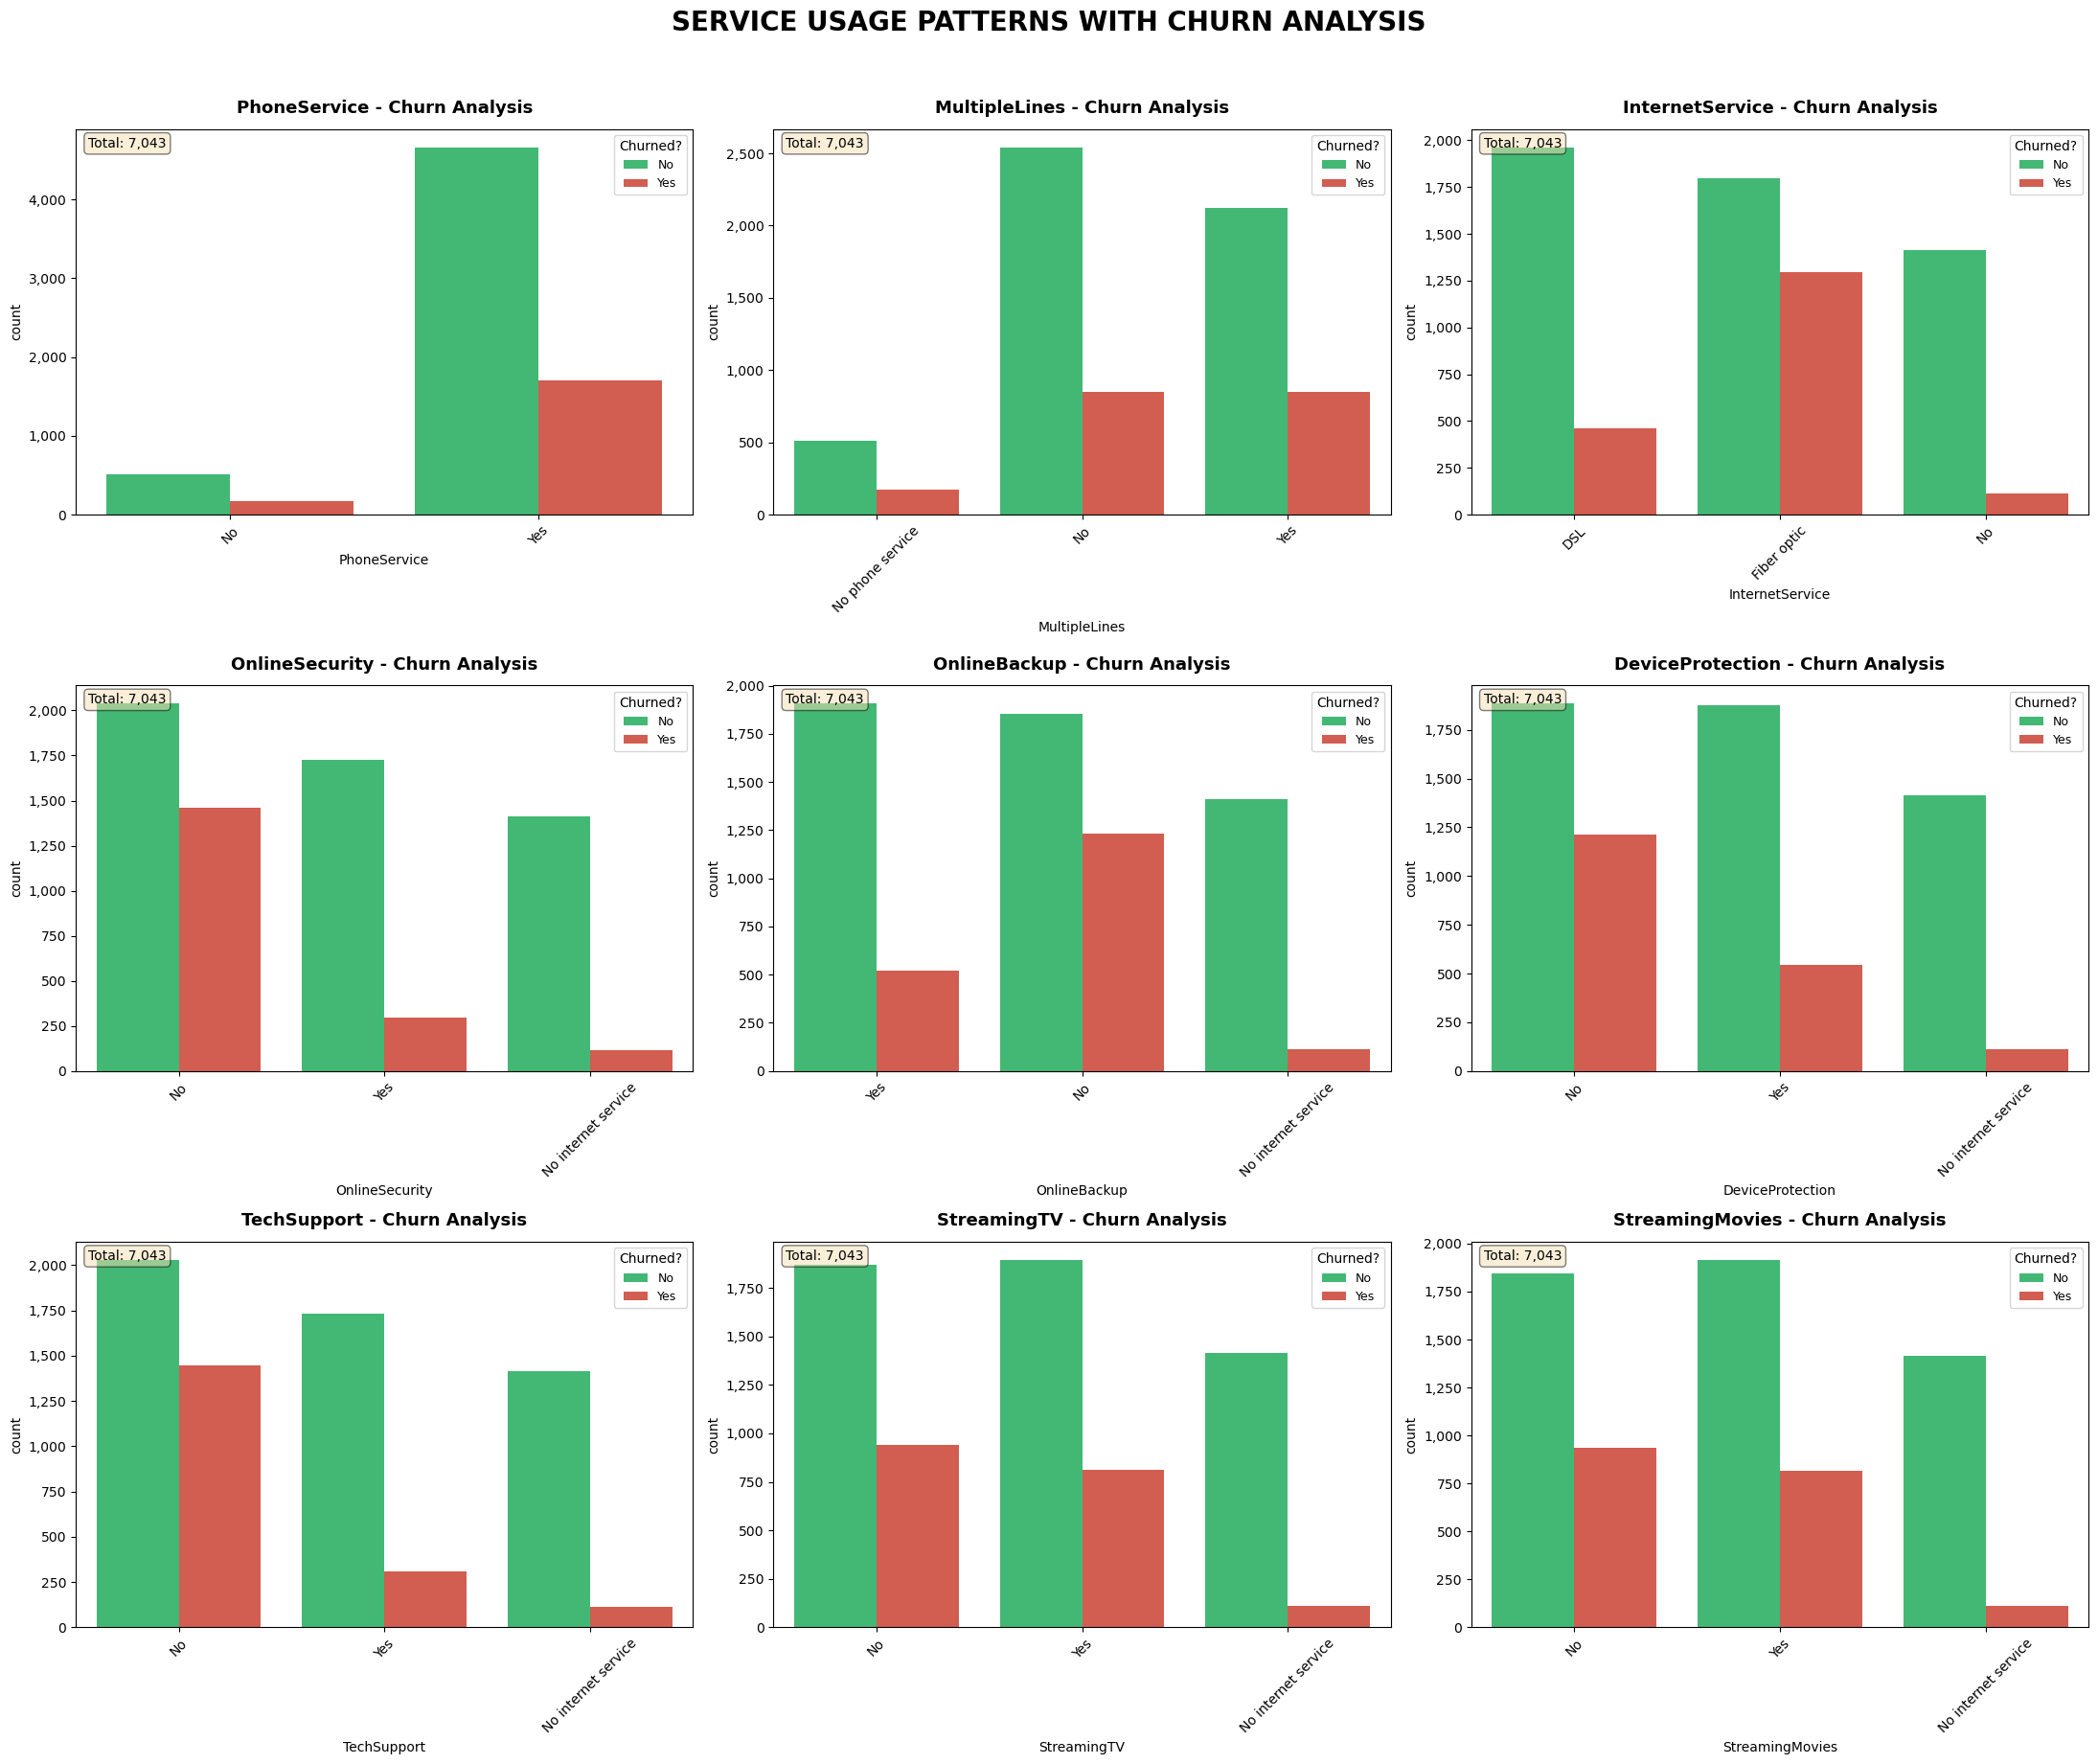

In [148]:
# Create subplots with churn analysis
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 6*n_rows))
axes = axes.flatten()

for idx, col in enumerate(service_columns):
    if idx < len(axes):
        ax = axes[idx]
        
        # Create countplot with churn hue
        sns.countplot(x=df[col], hue=df['Churn'], ax=ax, 
                      palette=['#2ecc71', '#e74c3c'])  # Green for No, Red for Yes
        
        # Title
        ax.set_title(f'{col} - Churn Analysis', fontsize=13, fontweight='bold', pad=12)
        
        # Rotate x-labels
        ax.tick_params(axis='x', rotation=45)
        
        # Add total count annotation
        total = len(df)
        ax.text(0.02, 0.98, f'Total: {total:,}', 
               transform=ax.transAxes, fontsize=10, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        # Add legend with better position
        ax.legend(title='Churned?', loc='upper right', fontsize=9)
        
        # Format y-axis
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Hide unused subplots
for idx in range(len(service_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('SERVICE USAGE PATTERNS WITH CHURN ANALYSIS', 
             fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Decisions:
- Phone service users are more loyal despite being the majority

#### - Churn Analysis by Payment Method:

In [153]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

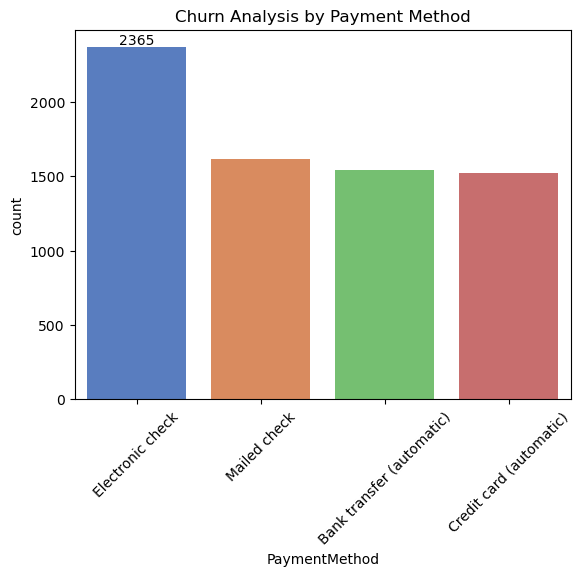

In [160]:
cnt = sns.countplot(data=df, x='PaymentMethod', palette='muted')
cnt.bar_label(cnt.containers[0])

plt.title("Churn Analysis by Payment Method")
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

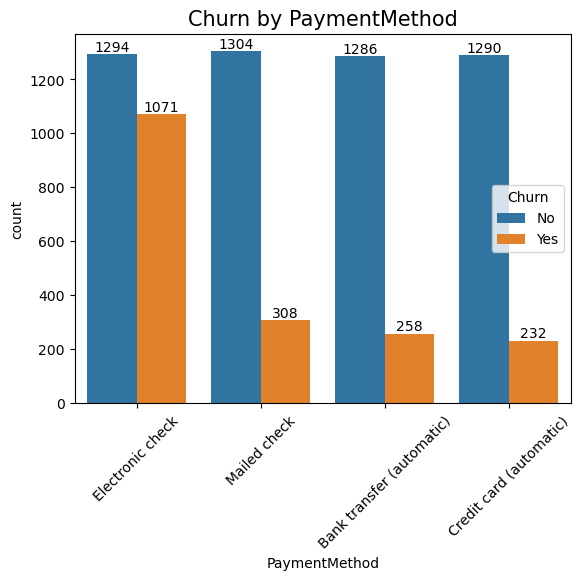

In [162]:
cnt = sns.countplot(x=df['PaymentMethod'], hue=df['Churn'])
cnt.bar_label(cnt.containers[0])
cnt.bar_label(cnt.containers[1])

plt.title('Churn by PaymentMethod', fontsize=15)
plt.xticks(rotation=45)

Decisions:

- Electronic check has highest churn.

- Automatic payments show better retention.

- Mailed check is least popular but moderate churn

- Key insight: Manual payment methods (electronic/mailed check) correlate with higher churn

- Action: Encourage automatic payments to improve retention